# User Segmentation via K-Means Clustering

In [1]:
path = 'C:/Users/2022080101/Desktop/Shopee_Dataset_2020/_DA_Marketing_Analytics'

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
file = os.listdir(path)

In [4]:
df = pd.read_csv(path+'/'+file[2])

In [5]:
df.columns

Index(['country_code', 'grass_date', 'user_id', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag', 'row_id'],
      dtype='object')

In [6]:
df.head(10)

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
5,4,2019-07-16 00:00:00+08:00,246,44,5,8,70,3,7,13,6,18,45,0,0,7,0,5
6,5,2019-07-16 00:00:00+08:00,258,43,13,3,3,0,0,0,9,32,46,2,3,3,0,6
7,6,2019-07-16 00:00:00+08:00,288,49,163,1,28,0,0,0,4,19,45,0,5,7,0,7
8,1,2019-07-16 00:00:00+08:00,350,49,7,5,26,2,4,7,1,8,10,0,1,1,1,8
9,4,2019-07-16 00:00:00+08:00,417,44,7,10,12,2,6,14,6,11,17,0,1,1,0,9


In [7]:
df['conversion'] = df['open_flag'].apply(lambda x: 1 if x == 1 else 0)

The behavior of conversion and non-conversion

In [8]:
user_0 = df[df.conversion == 0]

In [9]:
user_1 = df[df.conversion == 1]

In [10]:
user_0.describe()

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,conversion
count,62083.000000,62083.000000,62083.000000,62083.000000,62083.000000,62083.000000,62083.000000,62083.000000,62083.000000,62083.000000,62083.000000,62083.000000,62083.0,62083.000000,62083.0
mean,2.418778,63173.820933,43.932800,0.523557,1.783435,3.397565,8.301419,25.119276,48.744101,0.890582,2.751736,5.359519,0.0,37110.453313,0.0
std,1.640233,36192.467350,11.239801,1.137132,3.010386,5.377115,13.539434,38.182363,72.333273,2.816756,7.498398,13.683902,0.0,21141.556087,0.0
min,1.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,1.000000,31495.000000,34.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,18968.000000,0.0
50%,2.000000,63482.000000,43.000000,0.000000,1.000000,1.000000,3.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.0,37452.000000,0.0
75%,3.000000,95173.500000,52.000000,1.000000,2.000000,4.000000,12.000000,35.000000,68.000000,1.000000,3.000000,6.000000,0.0,55346.500000,0.0
max,7.000000,127925.000000,75.000000,24.000000,54.000000,115.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,0.0,73538.000000,0.0


Last 10 Days Behavior Segmentation (Non-winsorized) & (normalized)

In [19]:
used_df0 = user_0[['user_id','open_count_last_10_days','login_count_last_10_days','checkout_count_last_10_days']]

In [20]:
used_df0

,user_id,open_count_last_10_days,login_count_last_10_days,checkout_count_last_10_days
0,43,0,12,0
2,177,0,24,5
3,184,0,9,1
4,221,0,2,0
5,246,3,6,0
...,...,...,...,...
73532,127595,1,0,0
73534,127613,0,0,0
73535,127620,0,0,0
73536,127696,0,0,0


In [21]:
normalized_df0 = (used_df0 - used_df0.mean()) / used_df0.std()

In [22]:
normalized_df0

,user_id,open_count_last_10_days,login_count_last_10_days,checkout_count_last_10_days
0,-1.744308,-0.460419,0.273171,-0.316173
2,-1.740606,-0.460419,1.159471,1.458919
3,-1.740412,-0.460419,0.051596,0.038845
4,-1.739390,-0.460419,-0.465412,-0.316173
5,-1.738699,2.177797,-0.169979,-0.316173
...,...,...,...,...
73532,1.779961,0.418986,-0.613129,-0.316173
73534,1.780458,-0.460419,-0.613129,-0.316173
73535,1.780652,-0.460419,-0.613129,-0.316173
73536,1.782752,-0.460419,-0.613129,-0.316173


In [23]:
normalized_df0.describe()

,user_id,open_count_last_10_days,login_count_last_10_days,checkout_count_last_10_days
count,6.208300e+04,6.208300e+04,6.208300e+04,6.208300e+04
mean,-7.897081e-17,-6.346810e-15,-4.183607e-15,2.995769e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.745441e+00,-4.604191e-01,-6.131290e-01,-3.161729e-01
25%,-8.752877e-01,-4.604191e-01,-6.131290e-01,-3.161729e-01
50%,8.515006e-03,-4.604191e-01,-3.915540e-01,-3.161729e-01
75%,8.841530e-01,4.189864e-01,2.731710e-01,3.884541e-02
max,1.789079e+00,2.064531e+01,1.814689e+01,5.542170e+01


In [18]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df0[['open_count_last_10_days','login_count_last_10_days','checkout_count_last_10_days']]
)

In [26]:
four_cluster_df0 = normalized_df0[['open_count_last_10_days','login_count_last_10_days','checkout_count_last_10_days']].copy(deep=True)
four_cluster_df0['Cluster'] = kmeans.labels_

In [27]:
four_cluster_df0.head()

,open_count_last_10_days,login_count_last_10_days,checkout_count_last_10_days,Cluster
0,-0.460419,0.273171,-0.316173,0
2,-0.460419,1.159471,1.458919,3
3,-0.460419,0.051596,0.038845,0
4,-0.460419,-0.465412,-0.316173,0
5,2.177797,-0.169979,-0.316173,2


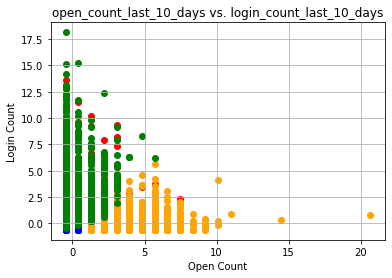

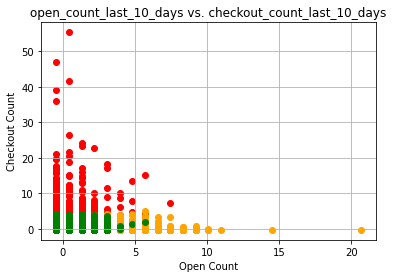

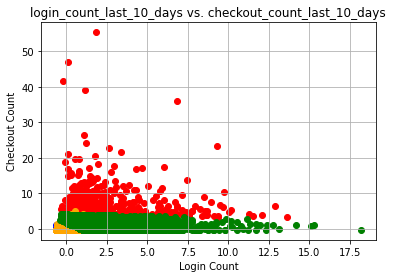

In [29]:
plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 0]['open_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 0]['login_count_last_10_days'],
    c='blue'
)

plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 1]['open_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 1]['login_count_last_10_days'],
    c='red'
)

plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 2]['open_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 2]['login_count_last_10_days'],
    c='orange'
)

plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 3]['open_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 3]['login_count_last_10_days'],
    c='green'
)

plt.title('open_count_last_10_days vs. login_count_last_10_days')
plt.xlabel('Open Count')
plt.ylabel('Login Count')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 0]['open_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 0]['checkout_count_last_10_days'],
    c='blue'
)

plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 1]['open_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 1]['checkout_count_last_10_days'],
    c='red'
)

plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 2]['open_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 2]['checkout_count_last_10_days'],
    c='orange'
)

plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 3]['open_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 3]['checkout_count_last_10_days'],
    c='green'
)

plt.title('open_count_last_10_days vs. checkout_count_last_10_days')
plt.xlabel('Open Count')
plt.ylabel('Checkout Count')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 0]['login_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 0]['checkout_count_last_10_days'],
    c='blue'
)

plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 1]['login_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 1]['checkout_count_last_10_days'],
    c='red'
)

plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 2]['login_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 2]['checkout_count_last_10_days'],
    c='orange'
)

plt.scatter(
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 3]['login_count_last_10_days'], 
    four_cluster_df0.loc[four_cluster_df0['Cluster'] == 3]['checkout_count_last_10_days'],
    c='green'
)

plt.title('login_count_last_10_days vs. checkout_count_last_10_days')
plt.xlabel('Login Count')
plt.ylabel('Checkout Count')

plt.grid()
plt.show()

# Selecting the best number of clusters

In [30]:
from sklearn.metrics import silhouette_score

In [32]:
for n_cluster in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
normalized_df0[['open_count_last_10_days','login_count_last_10_days','checkout_count_last_10_days']]
    )
    silhouette_avg = silhouette_score(
normalized_df0[['open_count_last_10_days','login_count_last_10_days','checkout_count_last_10_days']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.6109
Silhouette Score for 3 Clusters: 0.6111
Silhouette Score for 4 Clusters: 0.6032
Silhouette Score for 5 Clusters: 0.5666
Silhouette Score for 6 Clusters: 0.5369
Silhouette Score for 7 Clusters: 0.5510
Silhouette Score for 8 Clusters: 0.5118


It seems like we can set the cluster number to be 2 or 3.

In [33]:
kmeans = KMeans(n_clusters=3).fit(
    normalized_df0[['open_count_last_10_days','login_count_last_10_days','checkout_count_last_10_days']]
)

In [34]:
three_cluster_df0 = normalized_df0[['open_count_last_10_days','login_count_last_10_days','checkout_count_last_10_days']].copy(deep=True)
three_cluster_df0['Cluster'] = kmeans.labels_

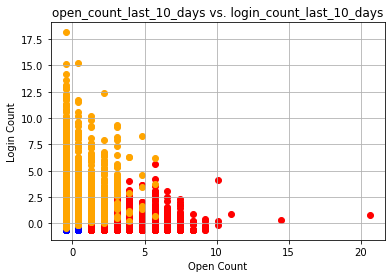

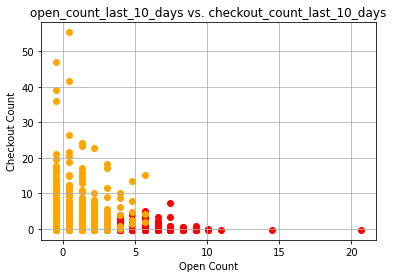

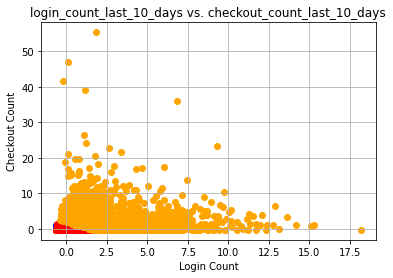

In [36]:
plt.scatter(
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 0]['open_count_last_10_days'], 
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 0]['login_count_last_10_days'],
    c='blue'
)

plt.scatter(
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 1]['open_count_last_10_days'], 
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 1]['login_count_last_10_days'],
    c='red'
)

plt.scatter(
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 2]['open_count_last_10_days'], 
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 2]['login_count_last_10_days'],
    c='orange'
)


plt.title('open_count_last_10_days vs. login_count_last_10_days')
plt.xlabel('Open Count')
plt.ylabel('Login Count')

plt.grid()
plt.show()


plt.scatter(
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 0]['open_count_last_10_days'], 
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 0]['checkout_count_last_10_days'],
    c='blue'
)

plt.scatter(
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 1]['open_count_last_10_days'], 
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 1]['checkout_count_last_10_days'],
    c='red'
)

plt.scatter(
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 2]['open_count_last_10_days'], 
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 2]['checkout_count_last_10_days'],
    c='orange'
)


plt.title('open_count_last_10_days vs. checkout_count_last_10_days')
plt.xlabel('Open Count')
plt.ylabel('Checkout Count')

plt.grid()
plt.show()


plt.scatter(
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 0]['login_count_last_10_days'], 
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 0]['checkout_count_last_10_days'],
    c='blue'
)

plt.scatter(
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 1]['login_count_last_10_days'], 
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 1]['checkout_count_last_10_days'],
    c='red'
)

plt.scatter(
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 2]['login_count_last_10_days'], 
    three_cluster_df0.loc[three_cluster_df0['Cluster'] == 2]['checkout_count_last_10_days'],
    c='orange'
)

plt.title('login_count_last_10_days vs. checkout_count_last_10_days')
plt.xlabel('Login Count')
plt.ylabel('Checkout Count')

plt.grid()
plt.show()